# Model Development for Application of AI Models for an Improved Construction Cost Estimate

In [6]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv('C:/Users/yobat/Desktop/Project/Dataset_NN.csv')
print(df.head())

# Define Features and Target
features = ['Material_Cost', 'Labor_Cost', 'Profit_Rate', 'Discount_or_Markup']
X = df[features]
y = df['Total_Estimate']

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Material_Cost  Labor_Cost  Profit_Rate  Discount_or_Markup  \
0          43985       12836           10                1095   
1          45504       17873           15               -6426   
2          33656        8401           25                9862   
3          36509        8523           20                8096   
4          37372       14123           30               -9598   

                                       Policy_Reason  Total_Estimate  
0  Market conditions require competitive pricing ...        63598.10  
1  Market conditions require competitive pricing ...        66457.55  
2  The client is a repeat customer, deserving a l...        62433.25  
3  The client is a repeat customer, deserving a l...        62134.40  
4  Strategic importance of this client justifies ...        57345.50  


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the features (X) and target (y)
categorical_columns = ["Policy_Reason"]  # Update this list based on your dataset
X = df.drop(columns=["Total_Estimate"])  # Exclude the target column
y = df["Total_Estimate"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    if col in X.columns:
        X[col] = label_encoder.fit_transform(X[col])

# Display the transformed dataset
print(X.head())

   Material_Cost  Labor_Cost  Profit_Rate  Discount_or_Markup  Policy_Reason
0          43985       12836           10                1095              0
1          45504       17873           15               -6426              0
2          33656        8401           25                9862              2
3          36509        8523           20                8096              2
4          37372       14123           30               -9598              1


## Exploratory data Analysis

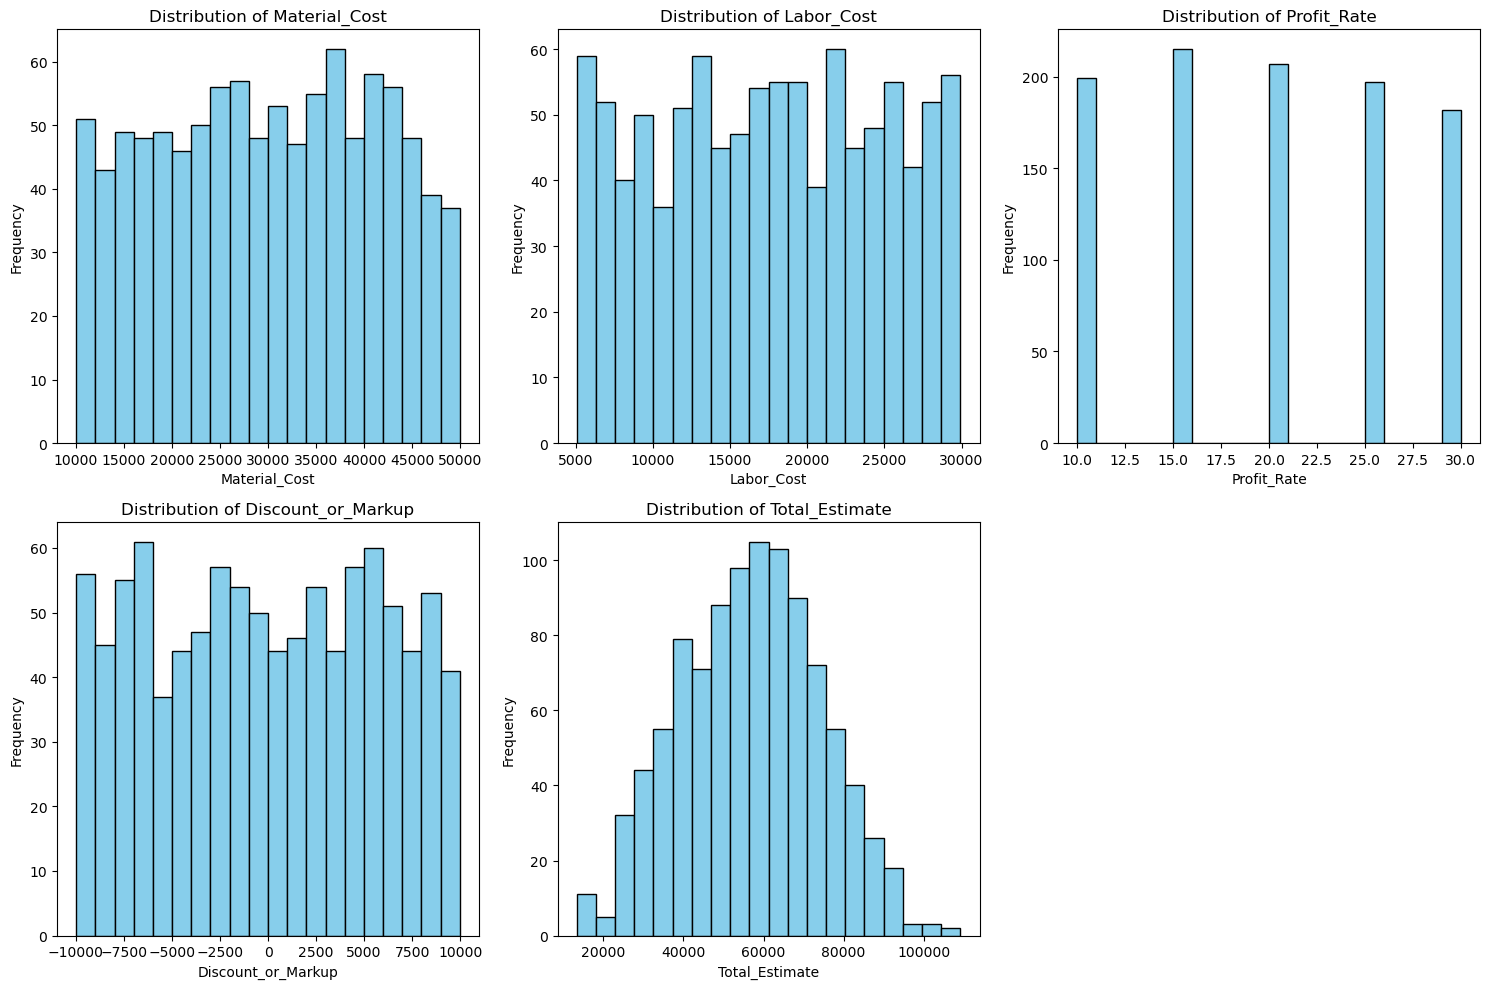

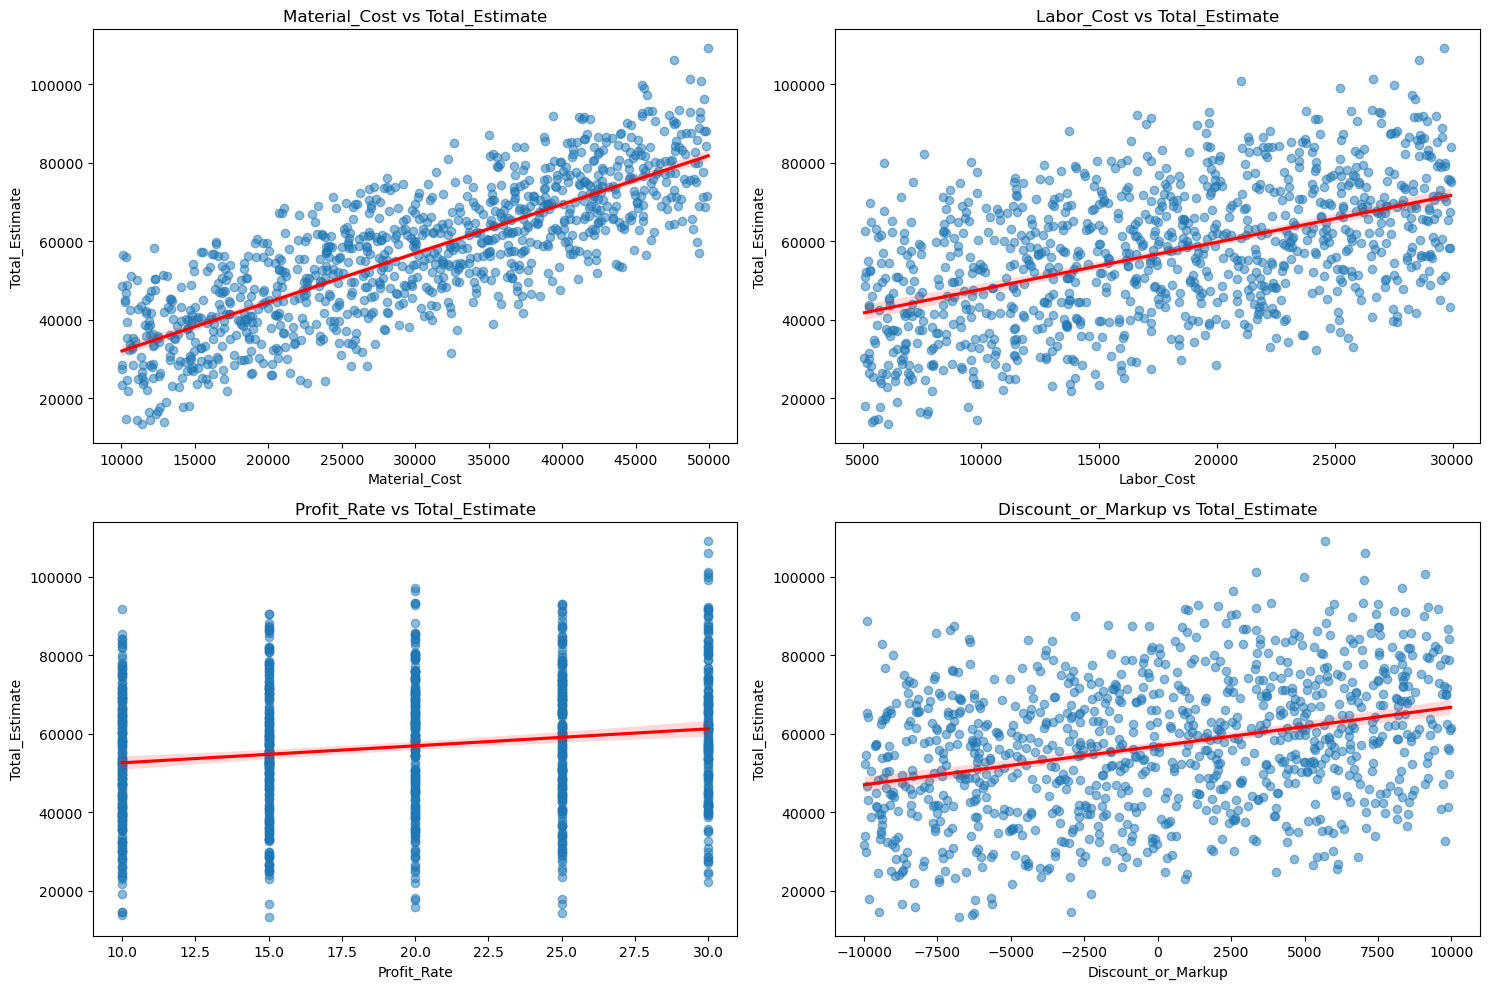

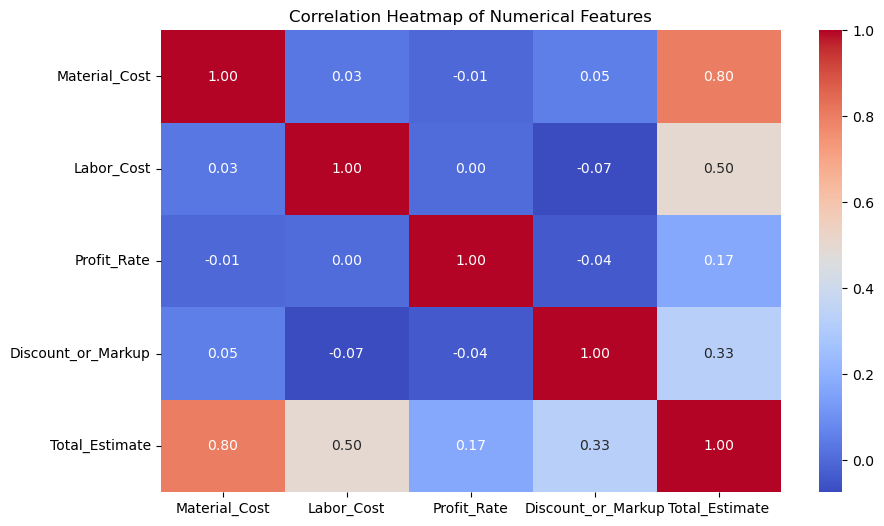

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
numerical_features = ['Material_Cost', 'Labor_Cost', 'Profit_Rate', 'Discount_or_Markup', 'Total_Estimate']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

features = ['Material_Cost', 'Labor_Cost', 'Profit_Rate', 'Discount_or_Markup']

# Plot histograms of each feature with respect to Total_Estimate
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=df[feature], y=df['Total_Estimate'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title(f"{feature} vs Total_Estimate")
    plt.xlabel(feature)
    plt.ylabel("Total_Estimate")
    
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Deploying Random Forest Model

In [16]:
# Deploy RF Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=40)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluate the model
print("R-squared:", r2_rf)
print("RMSE:", rmse_rf)
print("MSE:", mse_rf)

R-squared: 0.9714765009596275
RMSE: 2869.6607679980357
MSE: 8234952.923387077


## Deploying Linear Regression Model

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate the model
print("R-squared:", r2_lr)
print("RMSE:", rmse_lr)
print("MSE:", mse_lr)

R-squared: 0.996982704654192
RMSE: 933.3361165014484
MSE: 871116.3063660052


## Deploy SVM Model

In [27]:
from sklearn.svm import SVR

svm_model = SVR(kernel='poly', degree=5, coef0=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Evaluate the model
print("R-squared:", r2_svm)
print("RMSE:", rmse_svm)
print("MSE:", mse_svm)

R-squared: 0.7860360172404018
RMSE: 7859.582860455448
MSE: 61773042.74036505


## Deploy Decision Tree Model

In [30]:
dt_model = DecisionTreeRegressor(random_state=20)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Evaluate the model
print("R-squared:", r2_dt)
print("RMSE:", rmse_dt)
print("MSE:", mse_dt)

R-squared: 0.9180415175443223
RMSE: 4864.36454588238
MSE: 23662042.435237497


## Evaluating Model Performance Using RMSE, MSE, and R-Square

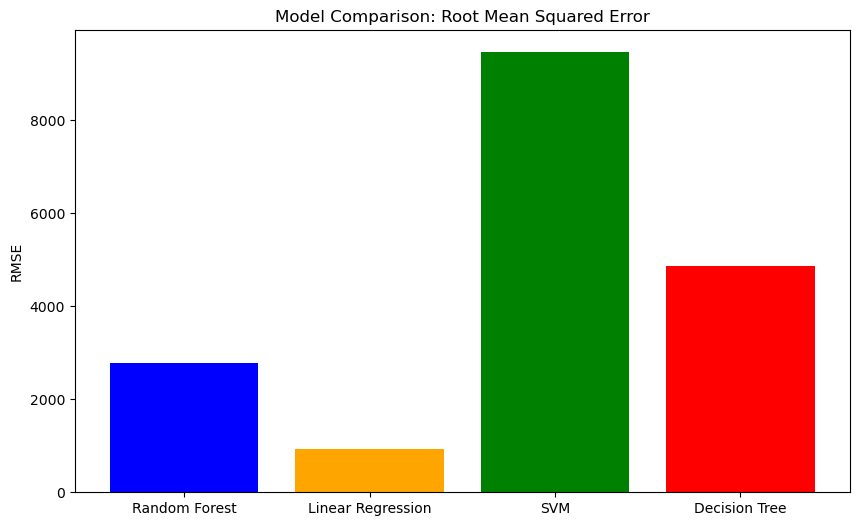

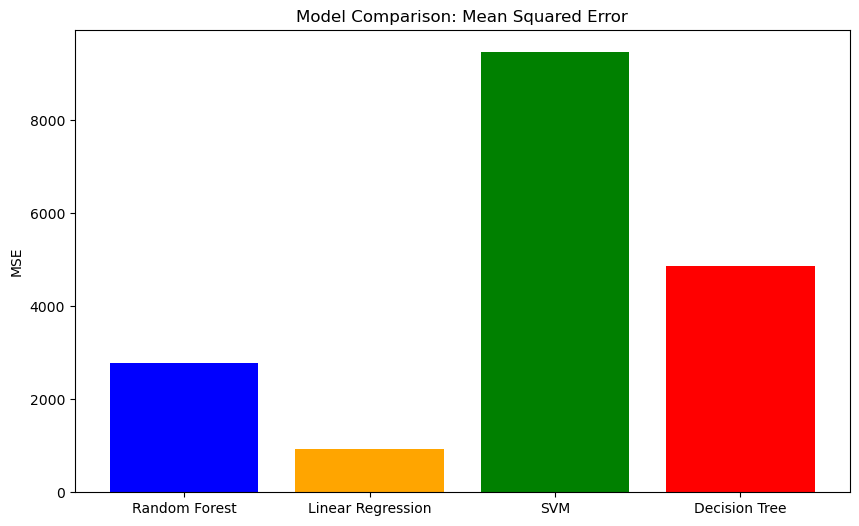

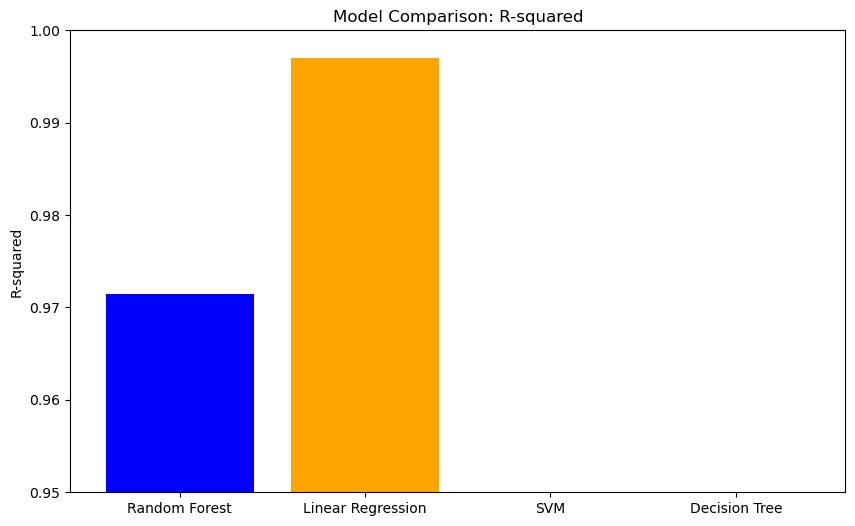

               Model  R-Squared           MSE         RMSE
0      Random Forest   0.971477  8.234953e+06  2788.412831
1  Linear Regression   0.996983  8.711163e+05   933.336117
2                SVM   0.786036  6.177304e+07  9460.141426
3      Decision Tree   0.918042  2.366204e+07  4864.364546


In [135]:
#Evaluation of Models

models = ['Random Forest', 'Linear Regression', 'SVM', 'Decision Tree']
mse_values = [mse_rf, mse_lr, mse_svm, mse_dt]
mse_values = [rmse_rf, rmse_lr, rmse_svm, rmse_dt]
r2_values = [r2_rf, r2_lr, r2_svm, r2_dt]

# Setting a DataFrame to store the results of Evaluation
evaluation_df = pd.DataFrame({
    'Model': models,
    'R-Squared': [r2_rf, r2_lr, r2_svm, r2_dt],
    'MSE': [mse_rf, mse_lr, mse_svm, mse_dt],
    'RMSE': [rmse_rf, rmse_lr, rmse_svm, rmse_dt]
})

# Visualizing RMSE using Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Model Comparison: Root Mean Squared Error')
plt.ylabel('RMSE')
plt.show()

# Visualizing Mean Squared Error using Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Model Comparison: Mean Squared Error')
plt.ylabel('MSE')
plt.show()

# Visualizing R-Square using Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Model Comparison: R-squared')
plt.ylabel('R-squared')
plt.ylim(0.95, 1)
plt.show()



print(evaluation_df)

## Comparing Model Prediction to Actual Values

In [117]:
# Display the first 20 predictions alongside actual values using all models approach
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted LR': y_pred_lr, 'Predicted RF': y_pred_rf, 'Predicted SVM': y_pred_svm, 'Predicted DT': y_pred_dt})
print(predictions_df.reset_index(drop=True).head(20))

       Actual   Predicted LR  Predicted RF  Predicted SVM  Predicted DT
0    53378.00   53965.245723    58721.2705   60223.922651      53740.60
1   109165.40  105668.721050    97387.3785  115345.716679     106087.10
2    43229.20   42341.600591    47629.2980   49722.711974      43599.00
3    59831.00   59653.148334    58056.3615   53317.814745      55213.30
4    92988.75   91766.548555    90204.4560   91937.707119      90538.55
5    41569.00   41596.804151    42683.8195   46373.930475      42616.75
6    62761.20   62682.202335    62815.2855   62779.757233      66457.55
7    49820.10   51641.908254    44397.0245   47113.607778      47027.00
8    38940.20   37497.850310    38998.1915   45841.624685      41586.90
9    57235.60   57104.464511    59137.4075   55216.941021      60893.05
10   72177.70   72447.913674    71712.1990   62395.805155      71922.80
11   85646.45   86593.812474    84844.7020   89715.341832      82605.80
12   90191.90   88023.516318    89126.6505   84834.766160      9

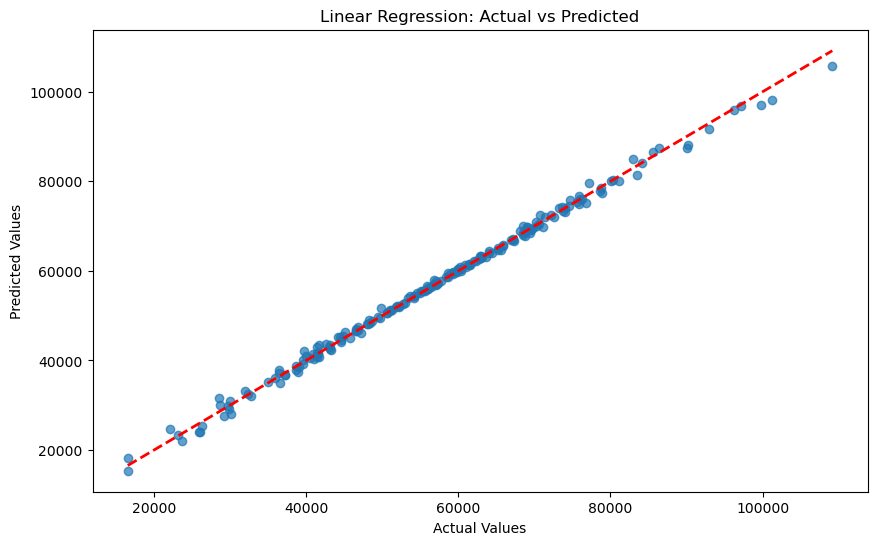

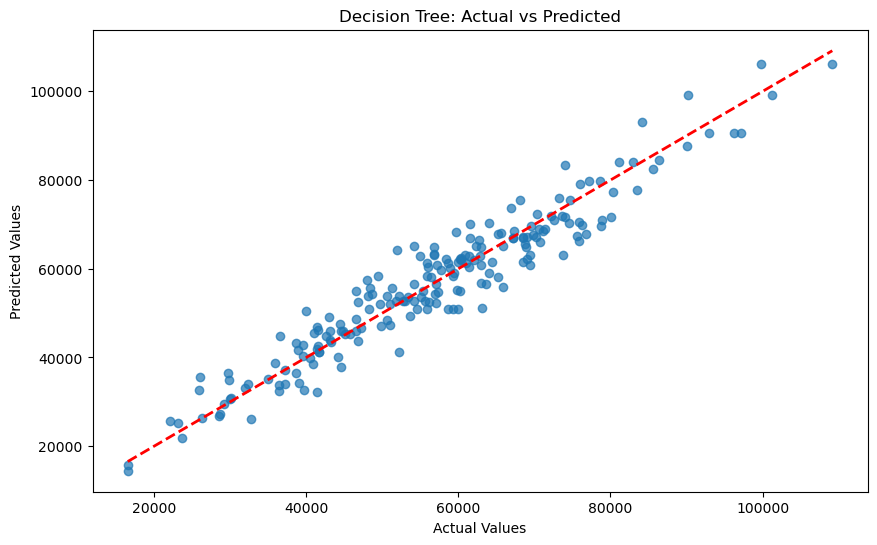

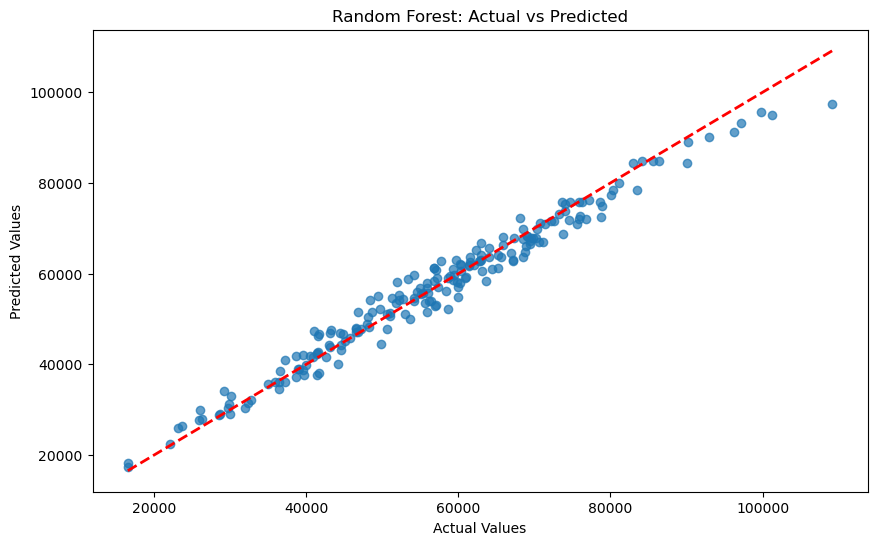

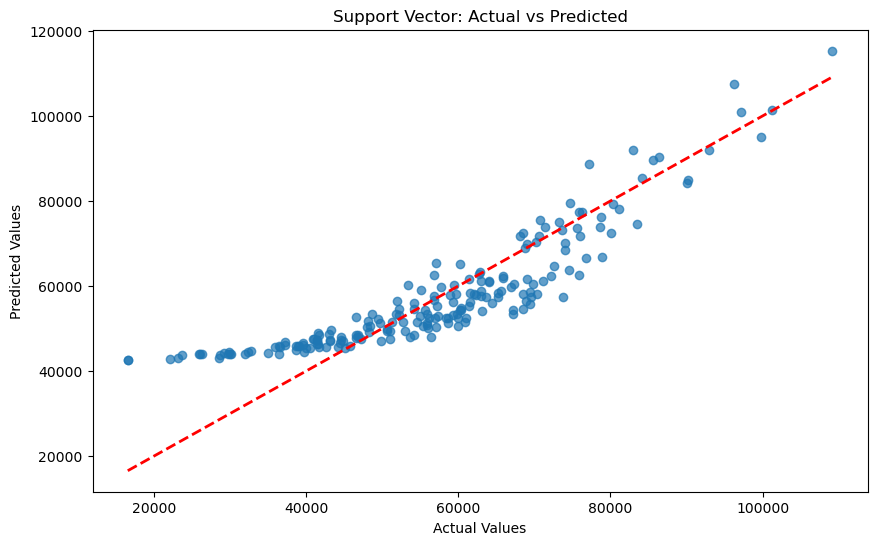

In [145]:

# Scatterplot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


# Scatterplot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


# Scatterplot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


# Scatterplot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.title("Support Vector: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

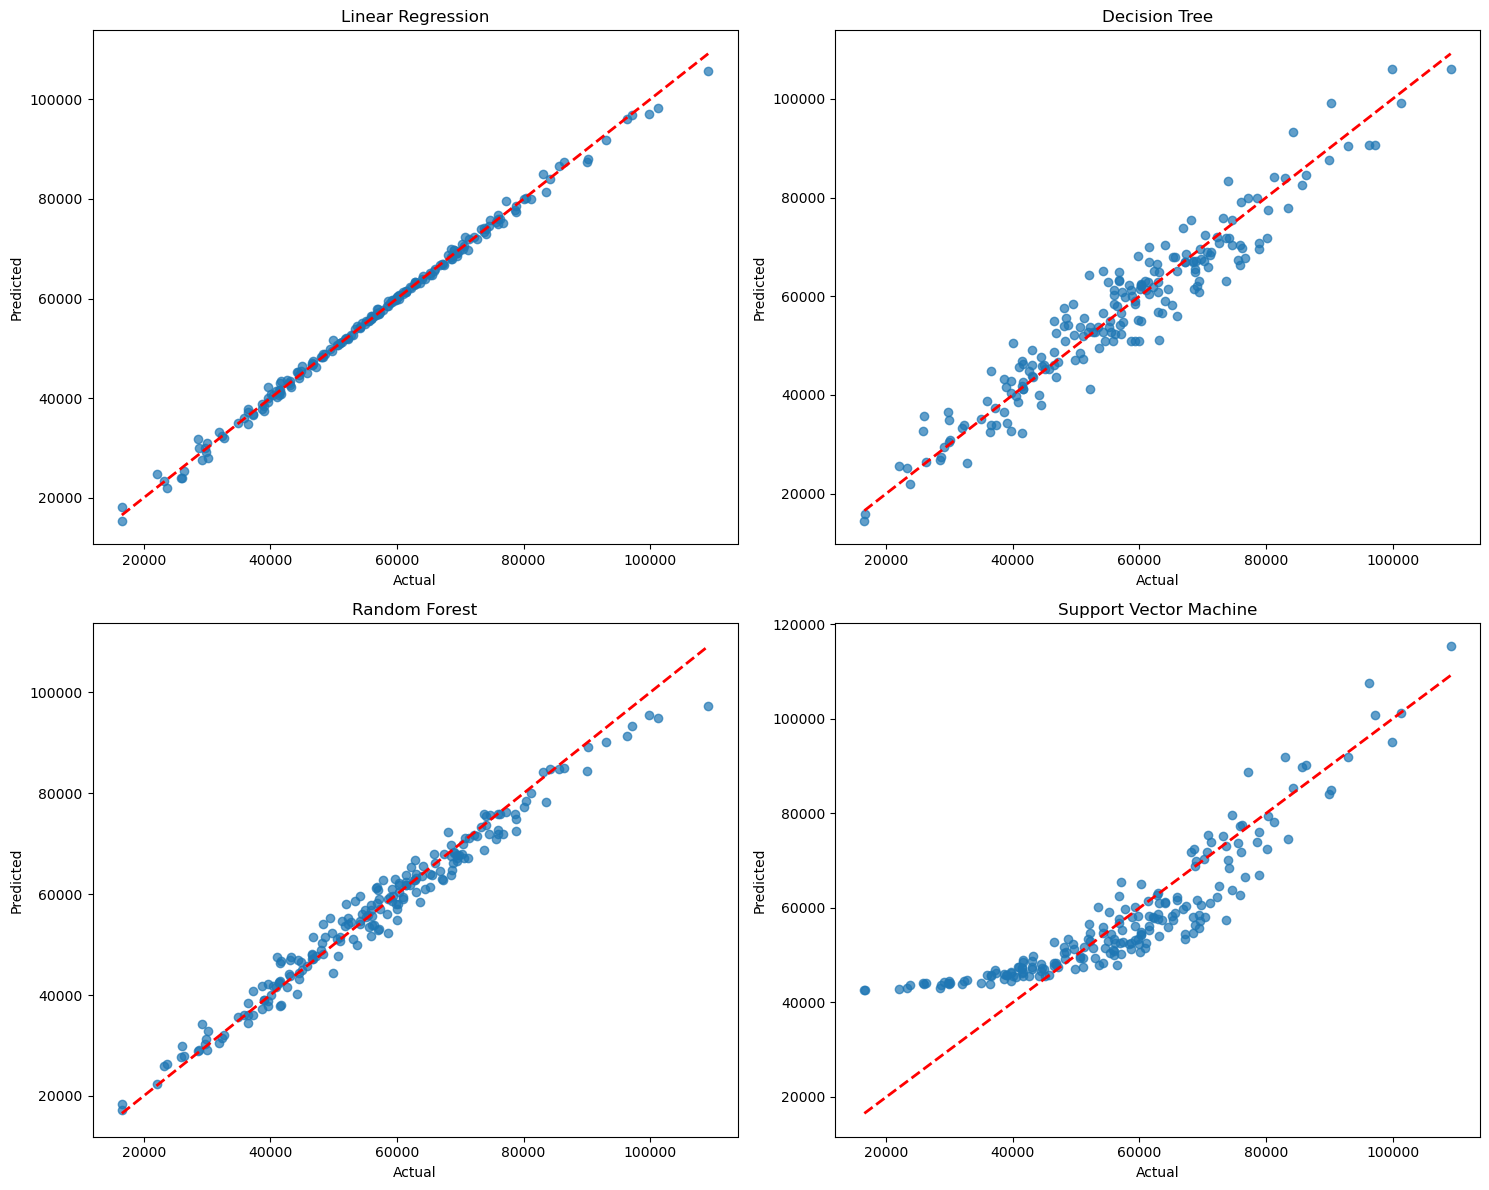

In [153]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Linear Regression
axes[0, 0].scatter(y_test, y_pred_lr, alpha=0.7)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0, 0].set_title("Linear Regression")
axes[0, 0].set_xlabel("Actual")
axes[0, 0].set_ylabel("Predicted")

# Decision Tree
axes[0, 1].scatter(y_test, y_pred_dt, alpha=0.7)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0, 1].set_title("Decision Tree")
axes[0, 1].set_xlabel("Actual")
axes[0, 1].set_ylabel("Predicted")

# Random Forest
axes[1, 0].scatter(y_test, y_pred_rf, alpha=0.7)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1, 0].set_title("Random Forest")
axes[1, 0].set_xlabel("Actual")
axes[1, 0].set_ylabel("Predicted")

# Support Vector
axes[1, 1].scatter(y_test, y_pred_svm, alpha=0.7)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1, 1].set_title("Support Vector Machine")
axes[1, 1].set_xlabel("Actual")
axes[1, 1].set_ylabel("Predicted")

# Adjust spacing
plt.tight_layout()
plt.show()
